# This notebook creates Figure 2

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sys,os
# adjust path!
sys.path.append("/home/cmetzner/Chandelier-Basket-Model/")

### Import necessary model and analysis modules

In [2]:
from Scripts.analysis import calcPowerSpectrum
from Scripts.plot_utility import plot_MEG_PSD_combination, plot_barplot

### Define model parameters

In [3]:
s               = 2**13
sim_time        = 500             # simulation stime (in ms) 
dt              = float(sim_time)/float(s)
time            = np.linspace(0,sim_time,int(sim_time/dt)+1)


l40=19
u40=22
l30=14
u30=17
l20=9
u20=12

frequencies     = [20.0,30.0,40.0]
chc_numbers     = [20,10,4,2]
chc_percentages = ['50','25','10','05']

### Load data

In [4]:
os.chdir("/home/cmetzner/Chandelier-Basket-Model/Notebooks") 
data = np.load('../Data/fig2.npy')

### Plot Figure A

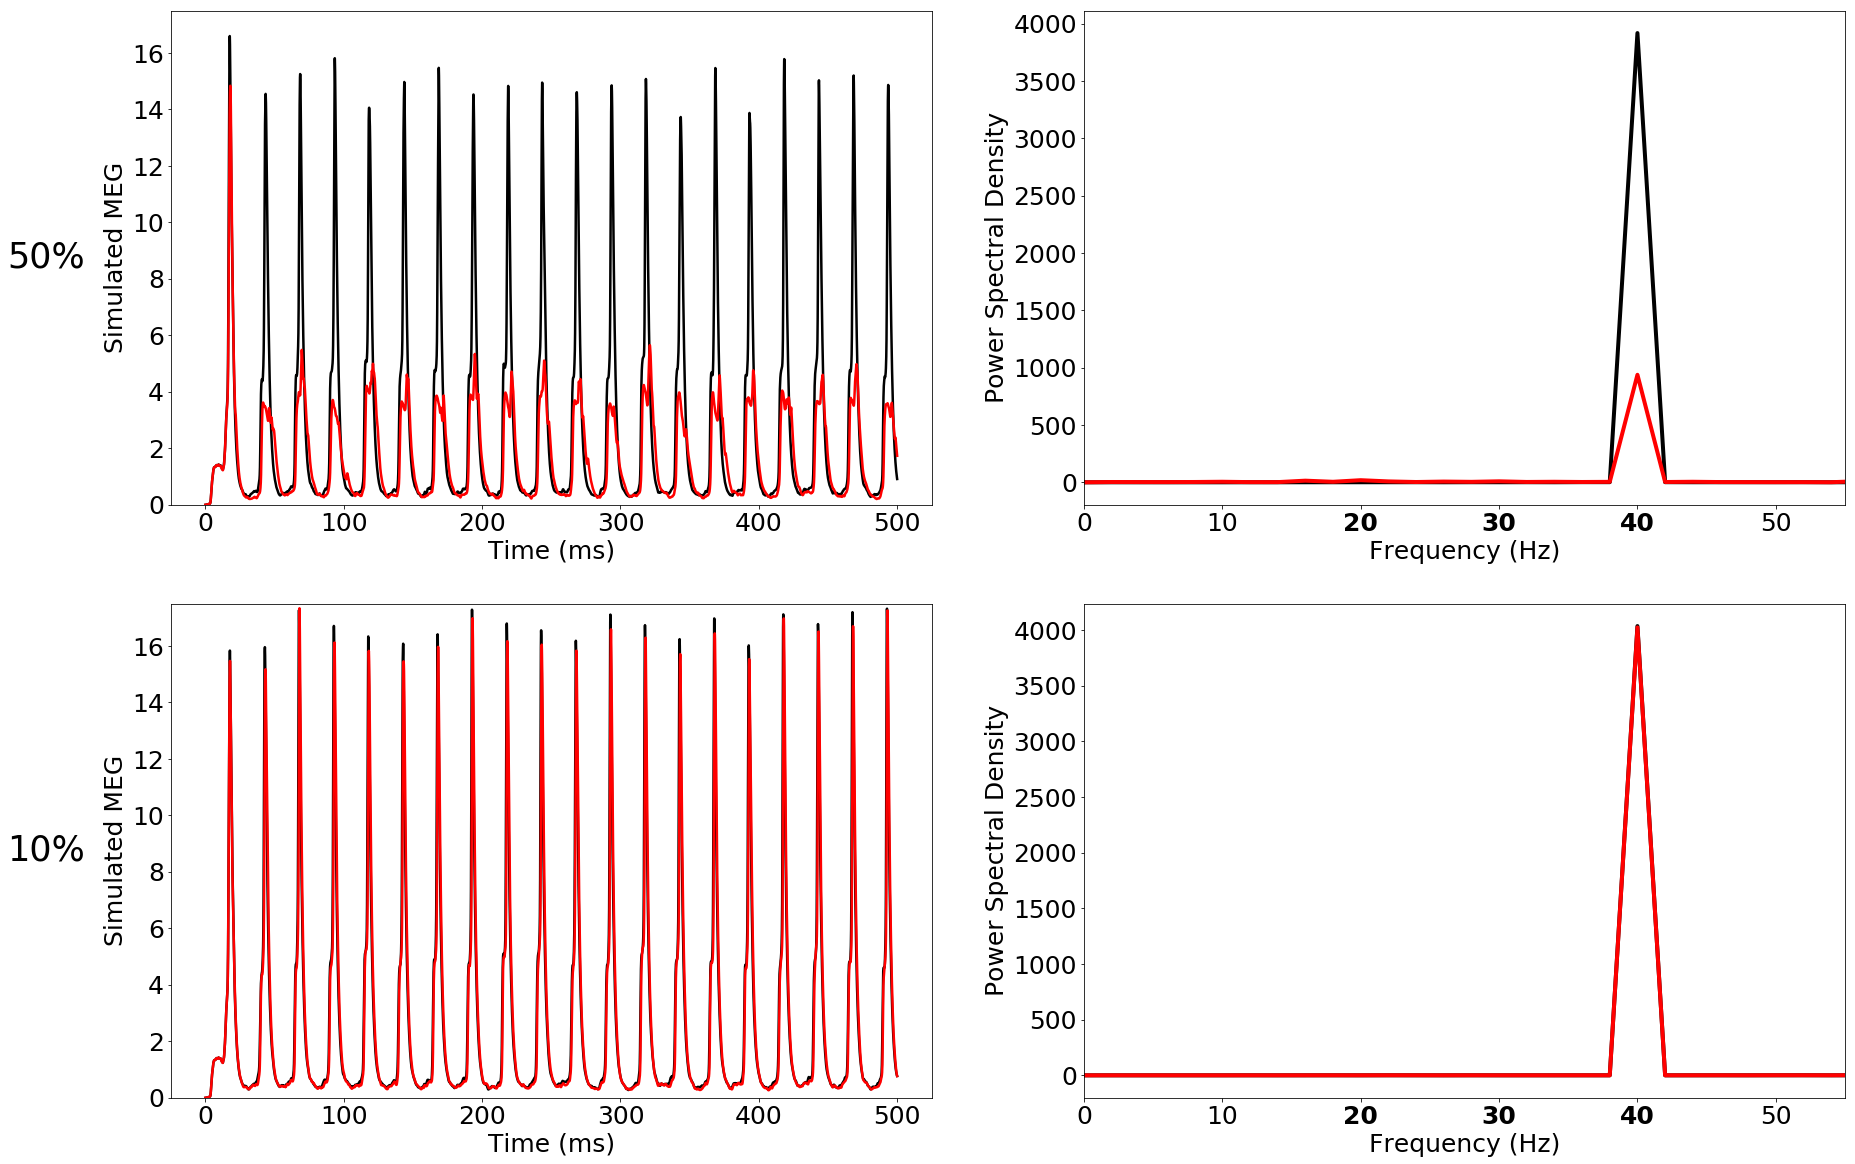

In [5]:
data_ctrl  = [data[0][2][0],data[2][2][0],data[0][0][0],data[2][0][0]]
data_schiz = [data[0][2][1],data[2][2][1],data[0][0][1],data[2][0][1]]

psd_data_ctrl  = []
psd_data_schiz = []


for d in data_ctrl:
    pxx,freqs = calcPowerSpectrum(d,dt,sim_time)
    psd_data_ctrl.append(pxx)


for d in data_schiz:
    pxx,freqs = calcPowerSpectrum(d,dt,sim_time)
    psd_data_schiz.append(pxx)   

xlabel1 = 'Time (ms)'
ylabel1 = 'Simulated MEG'
xlabel2 = 'Frequency (Hz)'
ylabel2 = 'Power Spectral Density'
annotations = ['50%','10%']
plot_MEG_PSD_combination(time,freqs*1000,data_ctrl,data_schiz,psd_data_ctrl,psd_data_schiz,xlabel1,ylabel1,xlabel2,ylabel2,annotations,1,'../Figures/Figure_ChC_AlterationsA',[25,35,25])

### Create barplot for Figure B

In [5]:
'''data40  =  [data[0][2][0],data[1][2][0],data[2][2][0],data[3][2][0]]
datas40 =  [data[0][2][1],data[1][2][1],data[2][2][1],data[3][2][1]]

data30  =  [data[0][1][0],data[1][1][0],data[2][1][0],data[3][1][0]]
datas30 =  [data[0][1][1],data[1][1][1],data[2][1][1],data[3][1][1]]

data20  =  [data[0][0][0],data[1][0][0],data[2][0][0],data[3][0][0]]
datas20 =  [data[0][0][1],data[1][0][1],data[2][0][1],data[3][0][1]]
'''

data40  =  [data[0][2][0],data[2][2][0]]
datas40 =  [data[0][2][1],data[2][2][1]]

data30  =  [data[0][1][0],data[2][1][0]]
datas30 =  [data[0][1][1],data[2][1][1]]

data20  =  [data[0][0][0],data[2][0][0]]
datas20 =  [data[0][0][1],data[2][0][1]]


p4040_ctrl  = []
p4040_schiz = []
p3030_ctrl  = []
p3030_schiz = []
p2020_ctrl  = []
p2020_schiz = []
p4020_ctrl  = []
p4020_schiz = []
p2040_ctrl  = []
p2040_schiz = []

for d in data40:
    pxx,freqs = calcPowerSpectrum(d,dt,sim_time)
    p4040 = np.sum(pxx[l40:u40])
    p2040 = np.sum(pxx[l20:u20])
    p4040_ctrl.append(p4040)
    p2040_ctrl.append(p2040)


for d in datas40:
    pxx,freqs = calcPowerSpectrum(d,dt,sim_time)
    p4040 = np.sum(pxx[l40:u40])
    p2040 = np.sum(pxx[l20:u20])
    p4040_schiz.append(p4040)
    p2040_schiz.append(p2040)

for d in data30:
    pxx,freqs = calcPowerSpectrum(d,dt,sim_time)
    p3030 = np.sum(pxx[l30:u30])
    p3030_ctrl.append(p3030)


for d in datas30:
    pxx,freqs = calcPowerSpectrum(d,dt,sim_time)
    p3030 = np.sum(pxx[l30:u30])
    p3030_schiz.append(p3030)

    
for d in data20:
    pxx,freqs = calcPowerSpectrum(d,dt,sim_time)
    p2020 = np.sum(pxx[l20:u20])
    p4020 = np.sum(pxx[l40:u40])
    p2020_ctrl.append(p2020)
    p4020_ctrl.append(p4020)


for d in datas20:
    pxx,freqs = calcPowerSpectrum(d,dt,sim_time)
    p2020 = np.sum(pxx[l20:u20])
    p4020 = np.sum(pxx[l40:u40])
    p2020_schiz.append(p2020)
    p4020_schiz.append(p4020)

[3921.336978392172, 4036.254305034457]


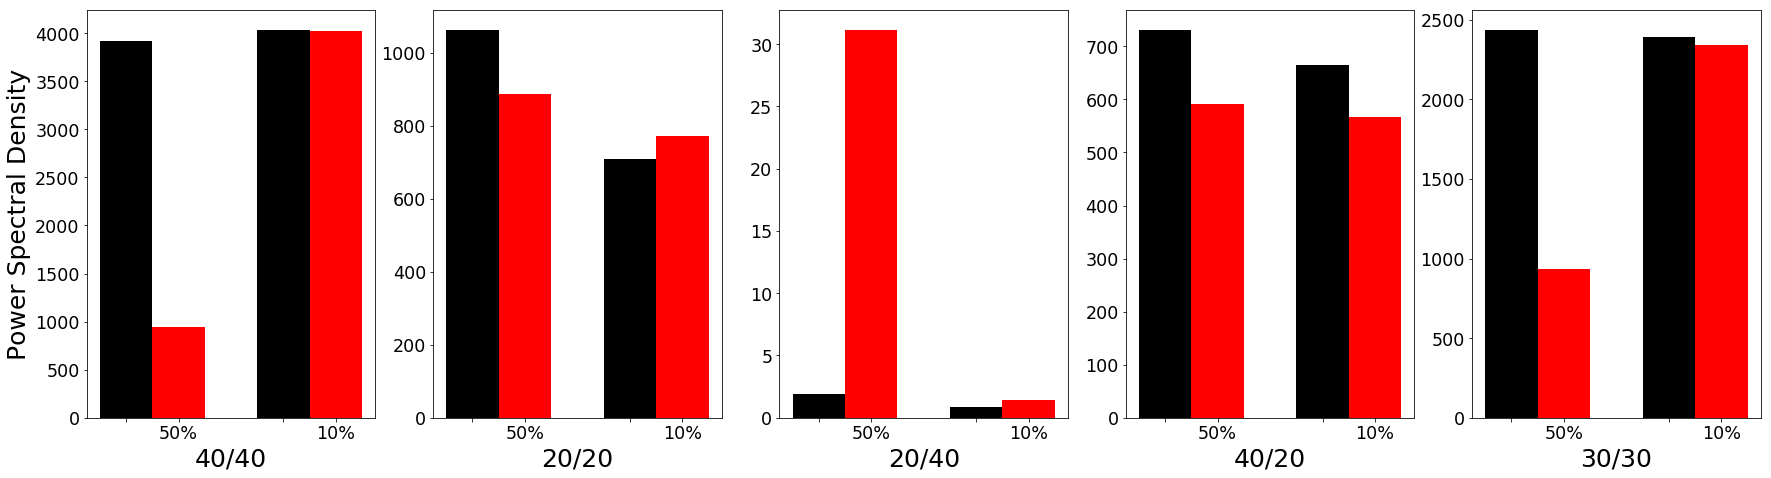

In [9]:
ctrl  = [p4040_ctrl,p2020_ctrl,p2040_ctrl,p4020_ctrl,p3030_ctrl]
schiz = [p4040_schiz,p2020_schiz,p2040_schiz,p4020_schiz,p3030_schiz]

print p4040_ctrl

x = [1,1.5,2.5,3]


xlabel = ['40/40','20/20','20/40','40/20','30/30']
ylabel = 'Power Spectral Density'
annotations = ''
colours = ['k','r','k','r']
tick_label = ['','50%','','10%']

plot_barplot(x,ctrl, schiz,xlabel,ylabel,annotations,colours,1,'../Figures/Figure_ChC_AlterationsB',[25,35,17.5],tick_label)

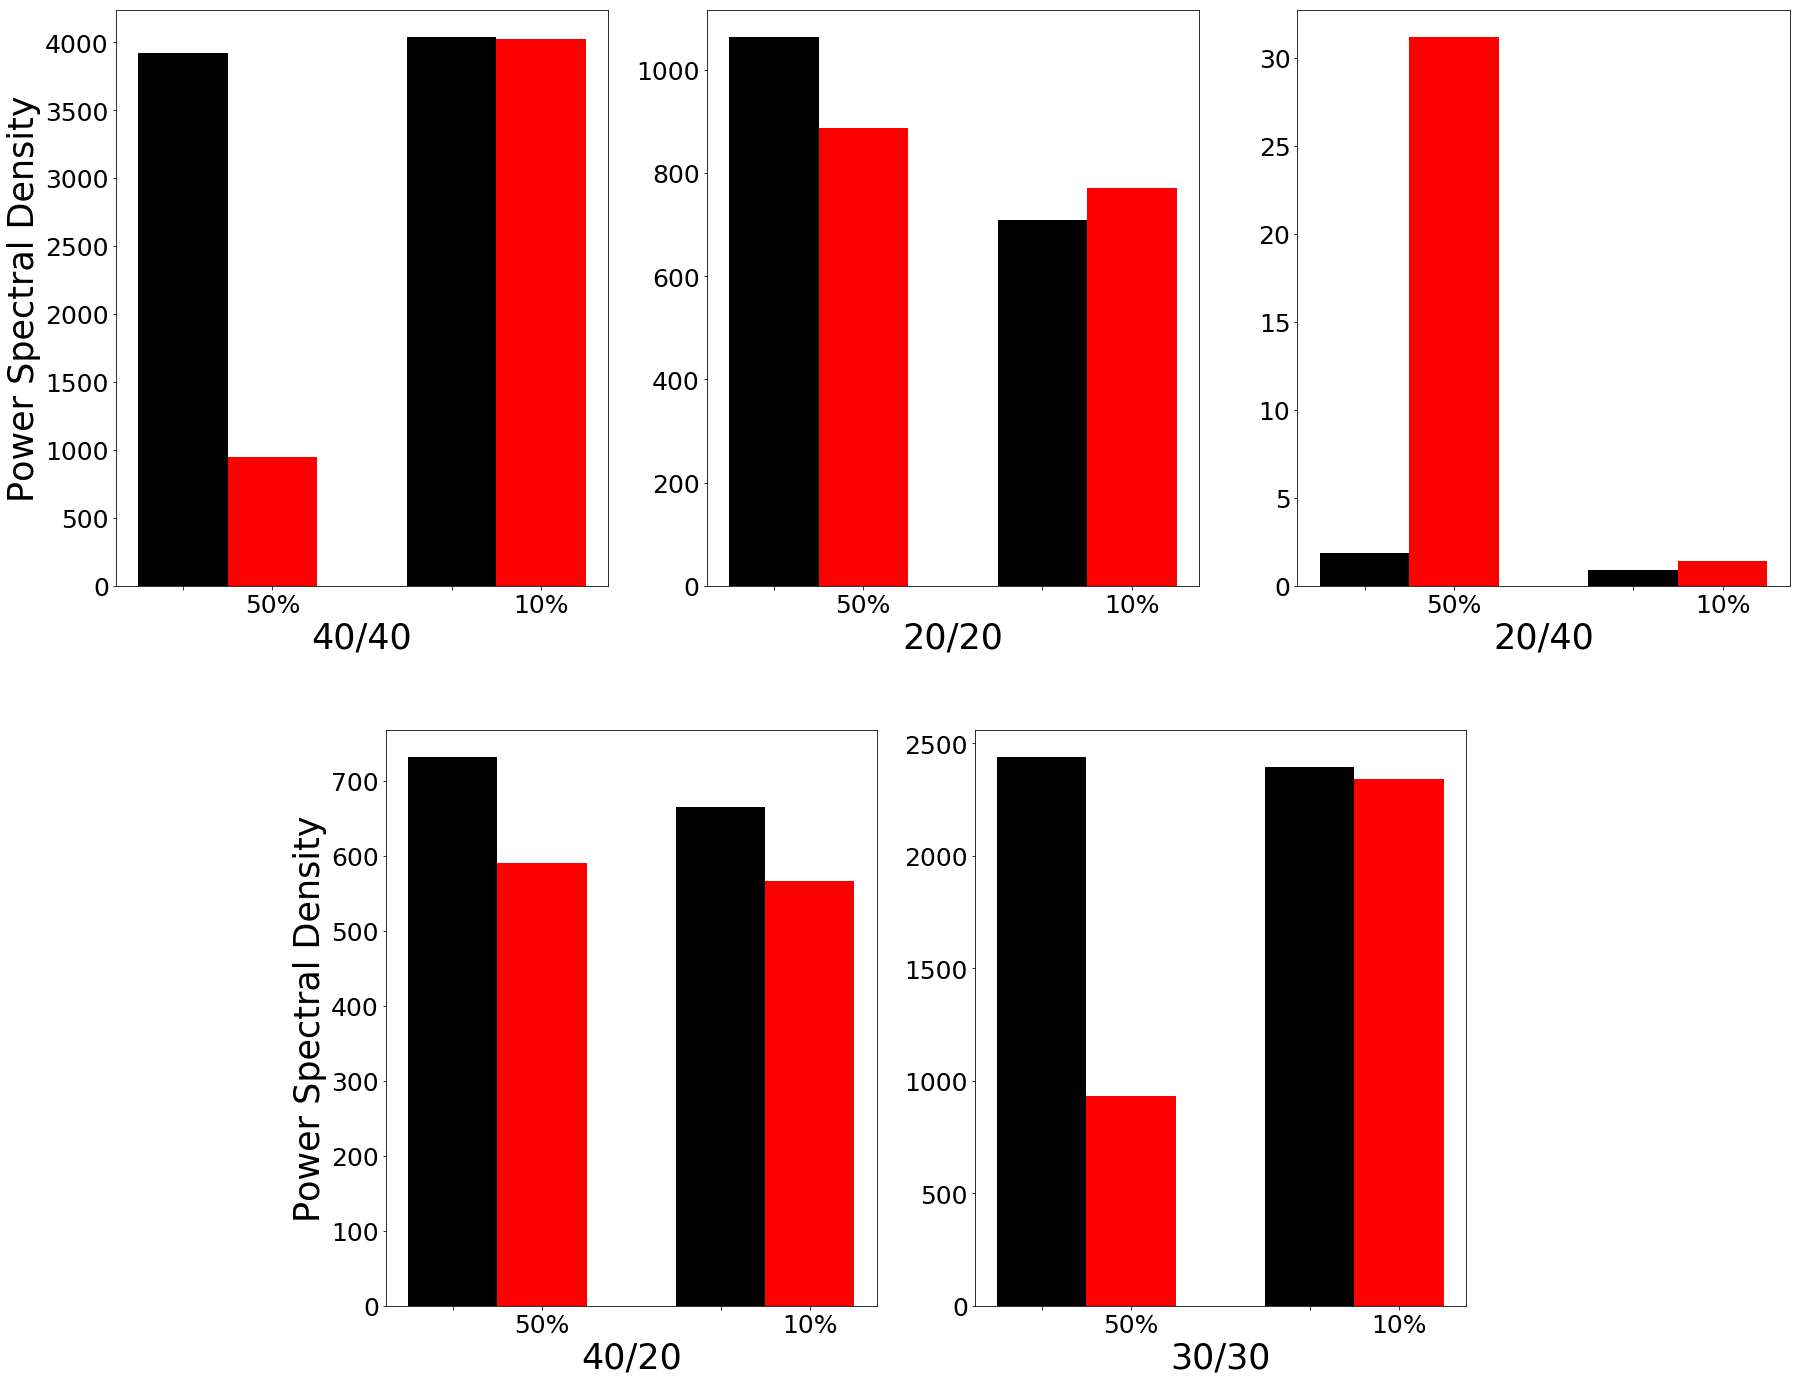

In [8]:
from Scripts.plot_utility import plot_barplot2

plot_barplot2(x,ctrl, schiz,xlabel,ylabel,annotations,colours,1,'../Figures/Figure_ChC_AlterationsB2',[35,45,25],tick_label)